In [1]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 KB 8.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.5/706.5 KB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 KB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.1/185.1 KB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

import pickle
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


In [3]:
df = pd.read_csv('Nizamabad.csv')
df.drop_duplicates(subset=None, inplace=True)
df.tail()

,district,date,min-temp,max-temp
1333,Nizamabad,2019-12-27,21.28,27.92
1334,Nizamabad,2019-12-28,17.26,27.88
1335,Nizamabad,2019-12-29,14.78,27.24
1336,Nizamabad,2019-12-30,16.24,28.06
1337,Nizamabad,2019-12-31,19.95,28.38


In [4]:
df.date.unique()

array(['2022-01-01', '2022-01-02', '2022-01-03', ..., '2019-12-29',
       '2019-12-30', '2019-12-31'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   district  1338 non-null   object 
 1   date      1338 non-null   object 
 2   min-temp  1338 non-null   float64
 3   max-temp  1338 non-null   float64
dtypes: float64(2), object(2)
memory usage: 52.3+ KB


In [6]:
df.columns

Index(['district', 'date', 'min-temp', 'max-temp'], dtype='object')

In [7]:
df.dtypes

district     object
date         object
min-temp    float64
max-temp    float64
dtype: object

In [8]:
df ['date'] = pd.to_datetime(df ['date'])
df.tail()

,district,date,min-temp,max-temp
1333,Nizamabad,2019-12-27,21.28,27.92
1334,Nizamabad,2019-12-28,17.26,27.88
1335,Nizamabad,2019-12-29,14.78,27.24
1336,Nizamabad,2019-12-30,16.24,28.06
1337,Nizamabad,2019-12-31,19.95,28.38


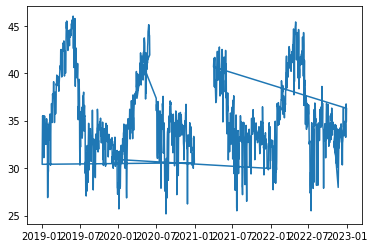

In [9]:
plt.plot(df ['date'], df ['max-temp'])
plt.show()

In [10]:
new_column = df[['date', 'max-temp']] 
new_column.dropna(inplace=True)
new_column.columns = ['ds', 'y'] 
new_column.tail()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
1333,2019-12-27,27.92
1334,2019-12-28,27.88
1335,2019-12-29,27.24
1336,2019-12-30,28.06
1337,2019-12-31,28.38


In [11]:
new_column

,ds,y
0,2022-01-01,30.82
1,2022-01-02,32.20
2,2022-01-03,32.98
3,2022-01-04,32.86
4,2022-01-05,32.82
...,...,...
1333,2019-12-27,27.92
1334,2019-12-28,27.88
1335,2019-12-29,27.24
1336,2019-12-30,28.06


In [12]:
new_column.ds.unique()

array(['2022-01-01T00:00:00.000000000', '2022-01-02T00:00:00.000000000',
       '2022-01-03T00:00:00.000000000', ...,
       '2019-12-29T00:00:00.000000000', '2019-12-30T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

**Training the forecasting model**

In [13]:
n = NeuralProphet()
model = n.fit(new_column, freq='D', epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.626% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.626% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 

Finding best initial lr:   0%|          | 0/228 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

**Forecasting the temperature into the future**

In [15]:
future = n.make_future_dataframe(new_column, periods=370)
forecast = n.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 97.235% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 97.235% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.73% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.73% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.73% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.73% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equ

Predicting: 42it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2023-01-01,None,33.14,36.51,-3.44,0.06
1,2023-01-02,None,33.00,36.52,-3.45,-0.07
2,2023-01-03,None,32.99,36.52,-3.45,-0.07
3,2023-01-04,None,33.14,36.52,-3.45,0.07
4,2023-01-05,None,33.14,36.52,-3.45,0.07


**visualize these predictions**

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


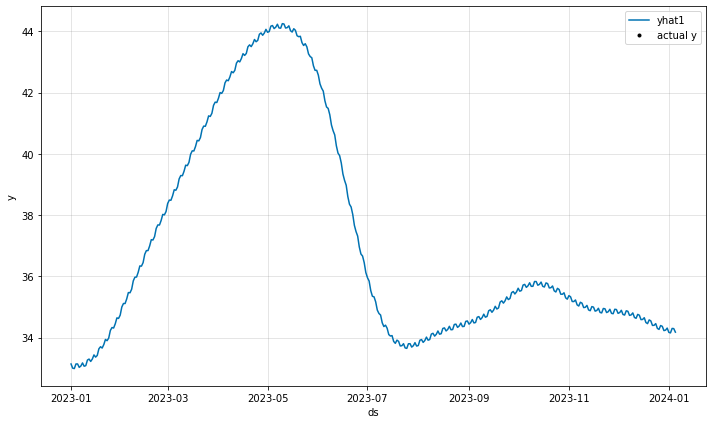

In [16]:
plot = n.plot(forecast)

In [17]:
Nizamabad_forecast = forecast[['ds', 'yhat1']]
Nizamabad_forecast = Nizamabad_forecast[:365]

In [19]:
data= Nizamabad_forecast[['ds', 'yhat1']] 
data.dropna(inplace=True)
data.columns = ['date', 'Temp'] 
data.tail()

,date,Temp
360,2023-12-27,34.40
361,2023-12-28,34.37
362,2023-12-29,34.23
363,2023-12-30,34.24
364,2023-12-31,34.31


**Data in CSV**

In [20]:
data.to_csv('Nizamabad2023.csv')